# Redes Neuronales Convolucionales (CNN)
En esta clase veremos de qué manera logramos superar los obstáculos de representación de características que nos presentan las imágenes al ser tratadas solamente como matrices de píxeles. Mediante redes convolucionales podemos obtener features específicas que permitirán modelar mejor ciertos rasgos de las imágenes.

Una convolución es una transformación mediante cálculo matricial sobre los píxeles de una imagen en sus distintos canales. Se aplica una máscara, que permitirá realzar ciertas características presentes o no en la imagen:

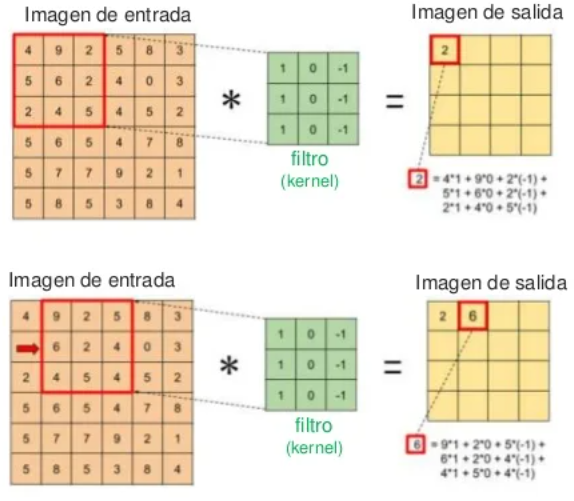

Los píxeles transformados formarán una nueva imagen, la cuál representará mejor una feature particular de interés, de acuerdo al problema de clasificación presente. Los pesos de las máscaras o kernels a aplicar (valores que multiplican las intensidades de los píxeles en cada posición) pueden entrenarse conjuntamente con los demás parámetros de la red, dotando al modelo de la capacidad de extraer "features abstractas" de alto nivel para alimentar a las capas densas al final de la red. Cada capa convolucional puede contener más de una convolución, por lo que se pueden obtener tantas features como se requiera.

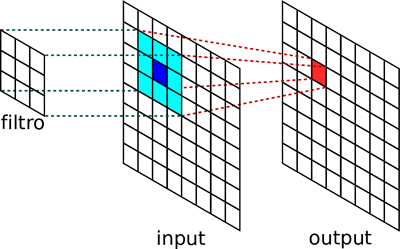

Luego de una capa de convolución, se aplica en general una capa de agrupamiento (Pooling). En este tipo de capa, se toma como valor de píxel correspondiente a un cuadrado de la imagen al píxel de mayor o menor intensidad, o al promedio del valor de los píxeles del área (MaxPooling, MinPooling o AvgPooling). De esta forma se obtiene una imagen de menor tamaño, resaltando características importantes.

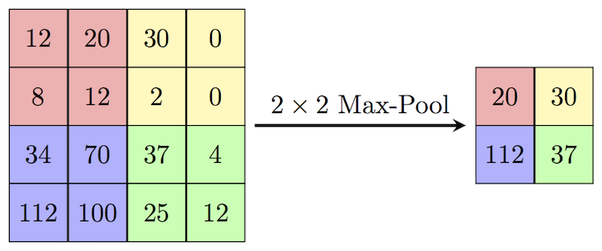

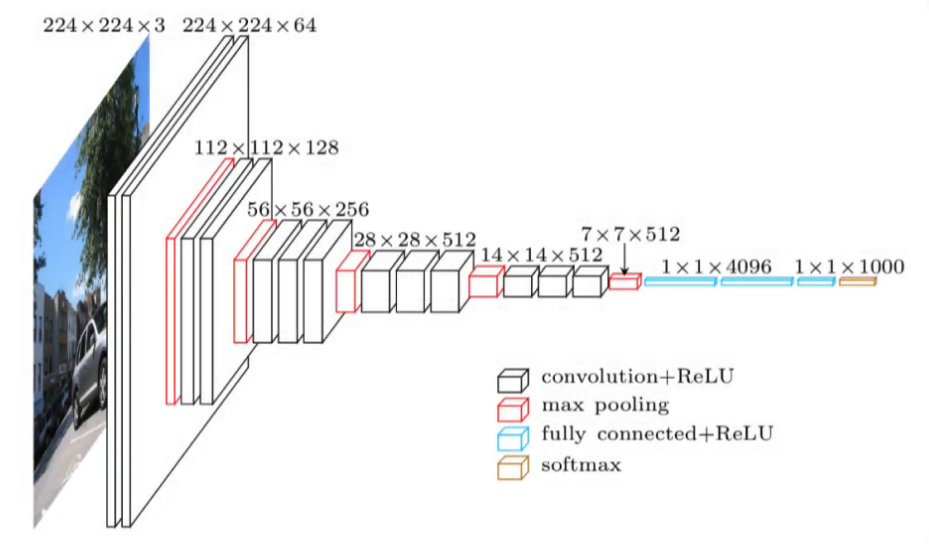

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 14s 0us/step


In [2]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

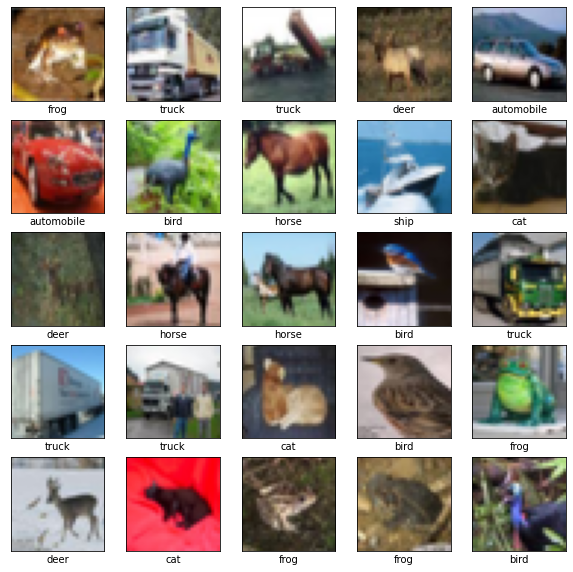

In [3]:
# Normalizar píxeles con valores entre 0 y 1
train_images, test_images = train_images / 255.0, test_images / 255.0

#Visualizamos algunas imágenes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Creamos el modelo convolucional

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

### Agregamos capas densas al final

In [5]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

### Arquitectura completa del modelo:

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

### Compilamos y entrenamos el modelo

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),#No estamos usando softmax en la última capa
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 20s 5ms/step - loss: 1.5366 - accuracy: 0.4393 - val_loss: 1.3033 - val_accuracy: 0.5383
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1712 - accuracy: 0.5844 - val_loss: 1.0911 - val_accuracy: 0.6152
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0186 - accuracy: 0.6401 - val_loss: 1.0130 - val_accuracy: 0.6493
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9221 - accuracy: 0.6748 - val_loss: 1.0321 - val_accuracy: 0.6378
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8500 - accuracy: 0.6998 - val_loss: 0.8913 - val_accuracy: 0.6910
Epoch 6/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.7950 - accuracy: 0.7225 - val_loss: 0.8846 - val_accuracy: 0.6940
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7437 - accuracy: 0.7371 - val_loss: 0.8961 - val_accuracy

### Evaluamos el modelo

313/313 - 1s - loss: 0.9069 - accuracy: 0.6990 - 760ms/epoch - 2ms/step


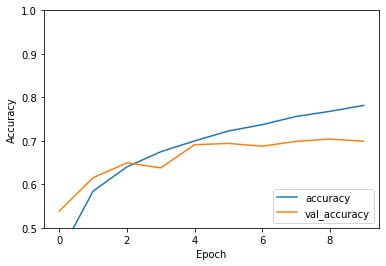

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [9]:
print(test_acc)

0.6990000009536743


Enlaces útiles:
*   Explicación de Redes Convolucionales en detalle: https://www.youtube.com/watch?v=4sWhhQwHqug
*   Uso de Tensorflow en "modo avanzado/experto": https://www.tensorflow.org/tutorials/quickstart/advanced
*   Armado de redes convolucionales con PyTorch: https://colab.research.google.com/github/juansensio/blog/blob/master/042_cnns/cnns.ipynb

## Ejercicio: Probar diferentes arquitecturas de convolución para mejorar la precisión sobre CIFAR10 obtenida anteriormente. Agregar Dropout también entre algunas capas